In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df1 = pd.read_csv("C:/Users/Sukkiiii/Downloads/Audible_Catlog.csv")
df2 = pd.read_csv("C:/Users/Sukkiiii/Downloads//Audible_Catlog_Advanced_Features.csv")

In [12]:
df = pd.merge(df1, df2, on=['Book Name', 'Author'], how='inner')

In [14]:
df = df.loc[:, ~df.columns.duplicated()]

In [16]:
df.head()

,Book Name,Author,Rating_x,Number of Reviews_x,Price_x,Rating_y,Number of Reviews_y,Price_y,Description,Listening Time,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top..."


In [18]:
# Handling missing values
df.fillna({'Rating_x': df['Rating_x'].median(),'Rating_y': df['Rating_y'].median(), 'Number of Reviews_x': 0,'Number of Reviews_y': 0, 'Price_x': df['Price_x'].median(),'Price_y': df['Price_y'].median()}, inplace=True)
df.dropna(subset=['Book Name', 'Author'], inplace=True)  # Ensure book names and authors are present

In [20]:
# Standardizing text fields
df['Book Name'] = df['Book Name'].str.strip()
df['Author'] = df['Author'].str.strip()
df['Description'] = df['Description'].fillna('No description available.')

In [22]:
def convert_time_to_minutes(time_str):
    """Convert time format (e.g., '5 hours and 30 minutes') to minutes."""
    if pd.isna(time_str):
        return np.nan
    time_str = time_str.lower()
    hours = int(time_str.split("hours")[0]) if "hours" in time_str else 0
    minutes = int(time_str.split("minutes")[0].split()[-1]) if "minutes" in time_str else 0
    return hours * 60 + minutes


In [24]:
# Convert listening time to minutes
df['Listening Time (minutes)'] = df['Listening Time'].apply(convert_time_to_minutes)

In [26]:
df['Main Genre'] = df['Ranks and Genre'].apply(lambda x: ', '.join([genre.split('in ')[-1].strip() for genre in x.split(',') if 'in ' in genre]) if pd.notna(x) else 'Unknown')

In [28]:
# Drop redundant columns
df.drop(columns=['Ranks and Genre', 'Listening Time'], inplace=True)

In [30]:
df['Rating']=(df['Rating_x']+df['Rating_y'])/2

In [32]:
df['Price']=(df['Price_x']+df['Price_y'])/2

In [34]:
df['Number of Reviews']=(df['Number of Reviews_x']+df['Number of Reviews_y'])/2

In [36]:
df.drop(columns=['Rating_x', 'Number of Reviews_x','Price_x','Rating_y', 'Number of Reviews_y','Price_y'], inplace=True)

In [38]:
df.head()

,Book Name,Author,Description,Listening Time (minutes),Main Genre,Rating,Price,Number of Reviews
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,"Over the past three years, Jay Shetty has beco...",654,"Audible Audiobooks & Originals), Personal Succ...",4.9,10080.0,342.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,Brought to you by Penguin.,203,"Audible Audiobooks & Originals), Meditation (A...",4.6,615.0,3670.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,"In this generation-defining self-help guide, a...",317,"Audible Audiobooks & Originals), Personal Succ...",4.4,10378.0,20240.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,Brought to you by Penguin.,335,"Audible Audiobooks & Originals), Psychology (A...",4.6,888.0,4646.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,"Stop going through life, Start growing throug...",385,"Audible Audiobooks & Originals), Literary Essa...",4.6,1005.0,4305.0


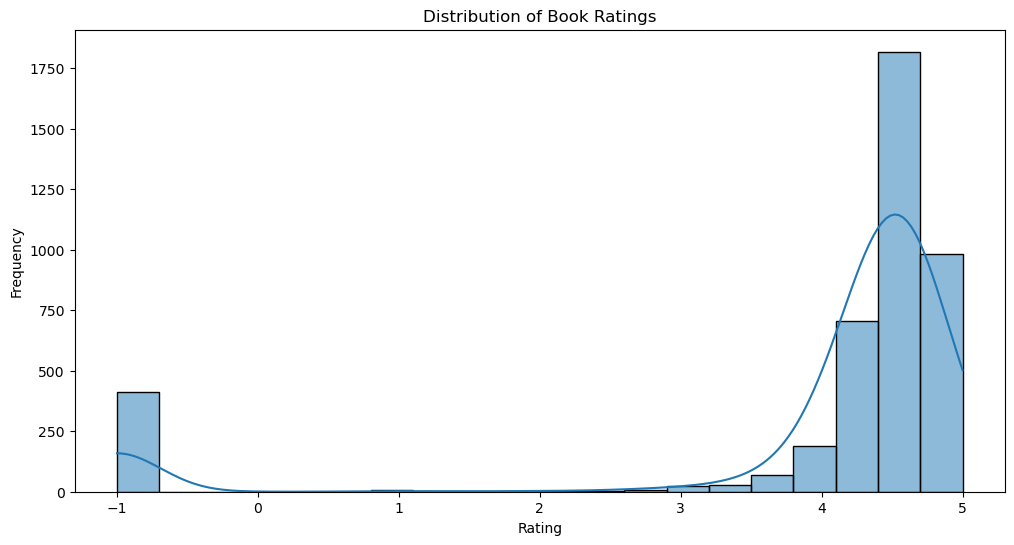

In [40]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

C:\Users\Sukkiiii\AppData\Local\Temp\ipykernel_3176\3683124560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


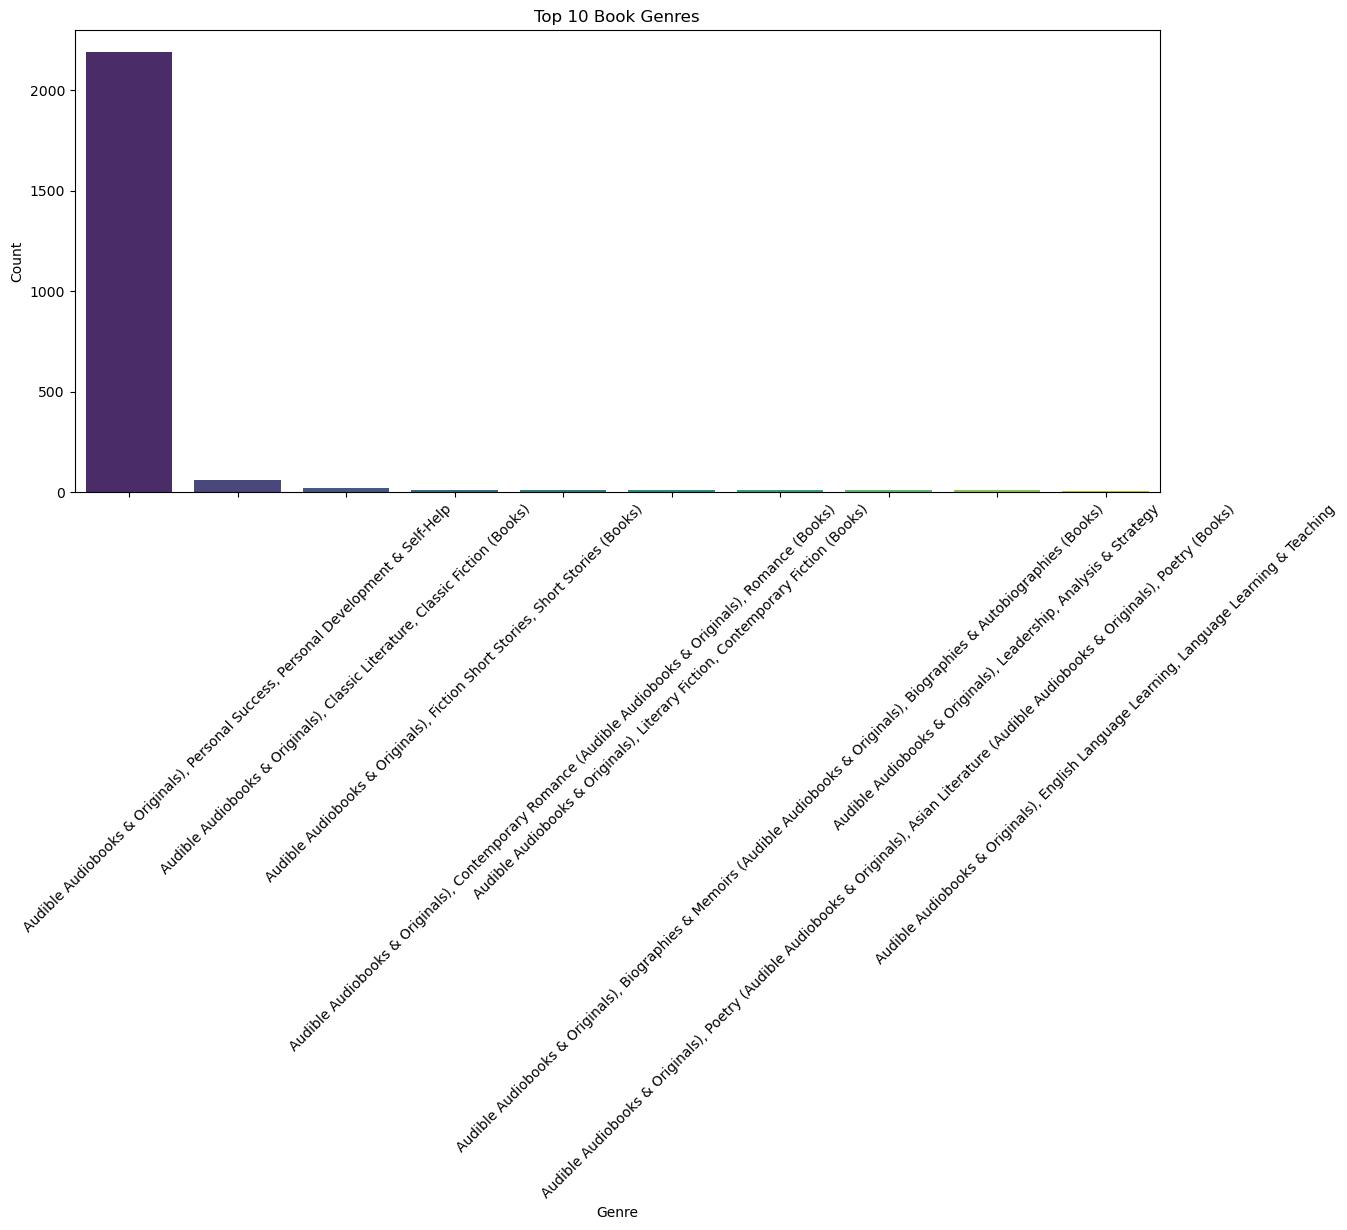

In [42]:
plt.figure(figsize=(14, 6))
top_genres = df['Main Genre'].value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Book Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

In [46]:
vectorizer = TfidfVectorizer(stop_words='english')
df['Description'] = df['Description'].fillna('')
tfidf_matrix = vectorizer.fit_transform(df['Description'])

In [48]:
# Compute similarity scores
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [50]:
def get_cluster_recommendations(title):
    idx = df.index[df['Book Name'] == title].tolist()[0]
    cluster_id = df.loc[idx, 'Cluster']
    cluster_books = df[df['Cluster'] == cluster_id][['Book Name', 'Author']].sample(5, random_state=42)
    return cluster_books

In [52]:
df.to_csv("C:/Users/Sukkiiii/Desktop/ME_DATA/DS/cleaned_audible_data.csv", index=False)